In [ ]:

                                             #Formative Assessment (Statistics)



!pip install scipy


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

# Load the dataset
df = pd.read_csv('house_price.csv')

# Display the first few rows of the dataset
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
# Display basic statistics about the dataset
print("\nDataset Description:")
print(df.describe())



Dataset Description:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [13]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [14]:
# Check unique values in each column
print("\nUnique Values:")
print(df.nunique())



Unique Values:
location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64


In [15]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)



Shape of the dataset:
(13200, 7)


In [16]:
# Display the column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [20]:
print("\nNumerical columns:")
print(numerical_cols)



Numerical columns:
['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']


In [21]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Number of duplicate rows:
1049


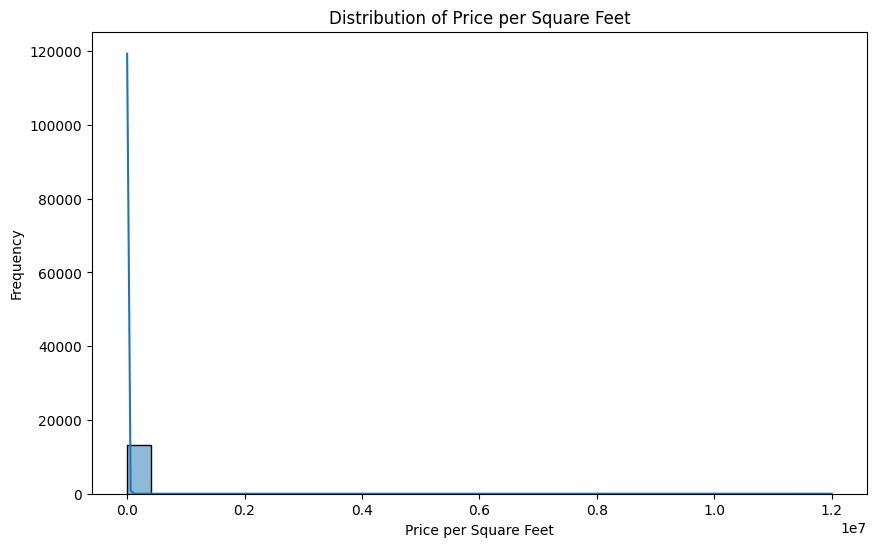

In [22]:
# Display distribution of price per square feet
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

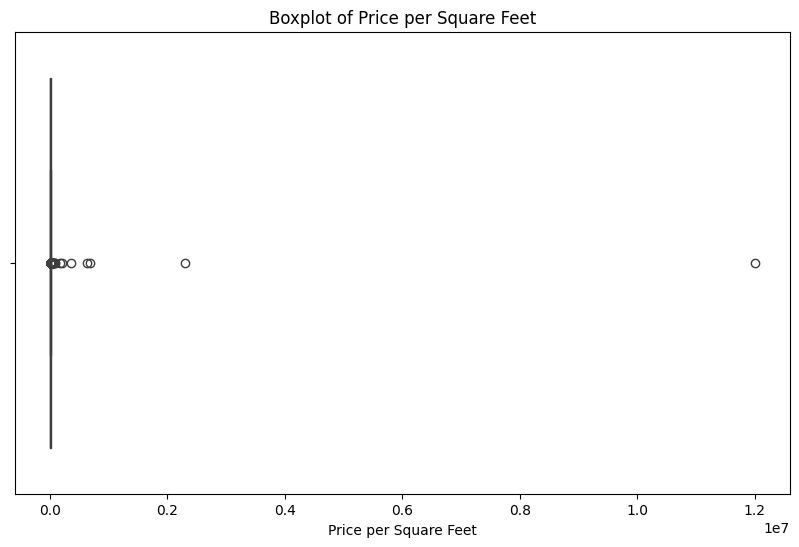

In [23]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title('Boxplot of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.show()


<Figure size 1500x1000 with 0 Axes>

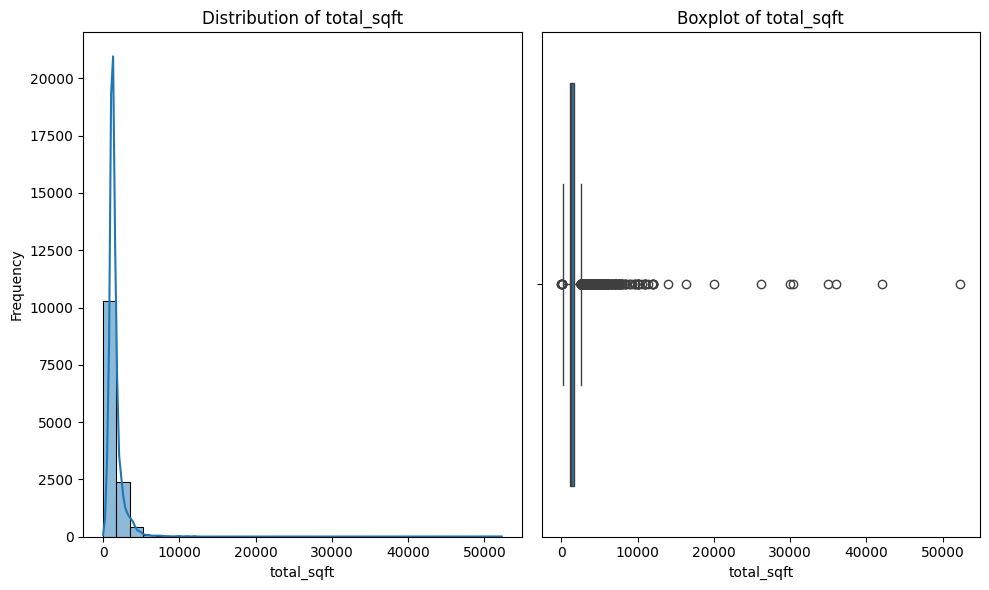

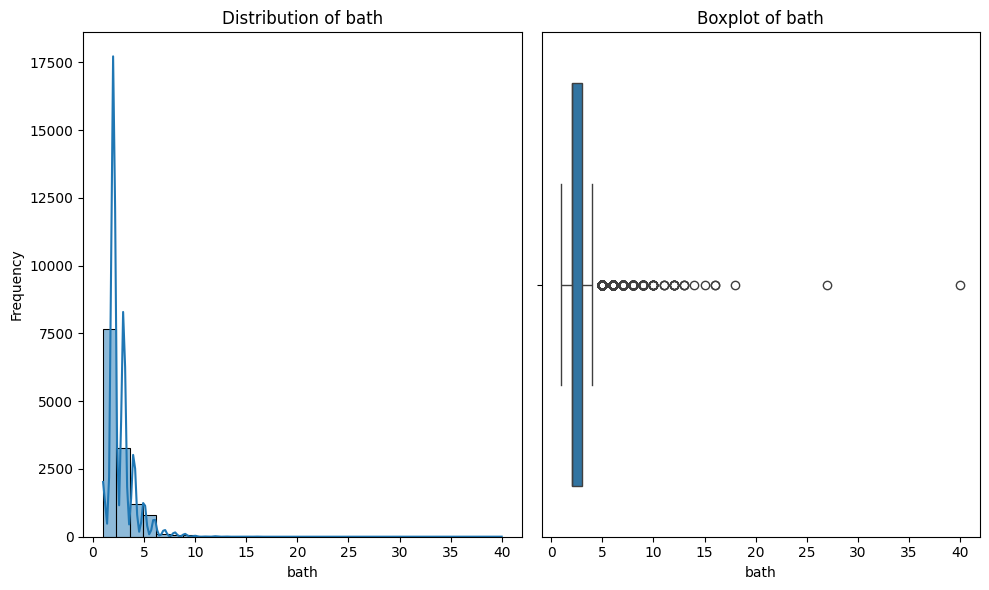

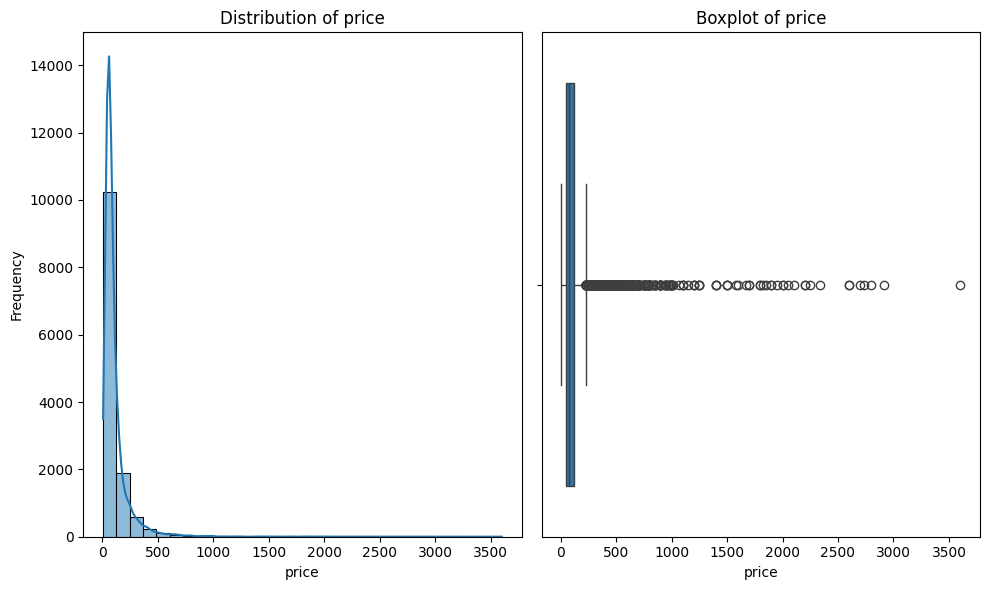

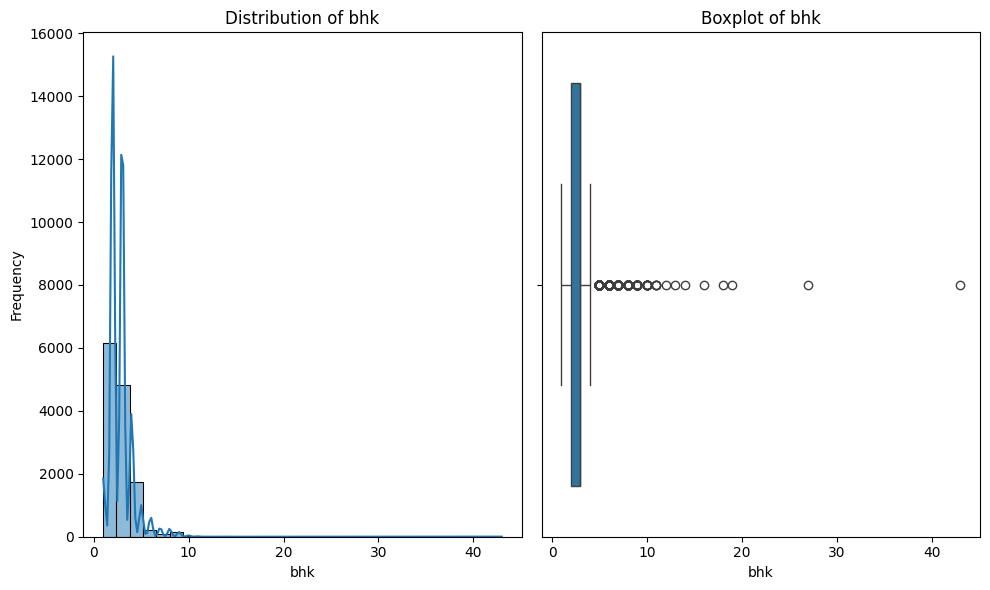

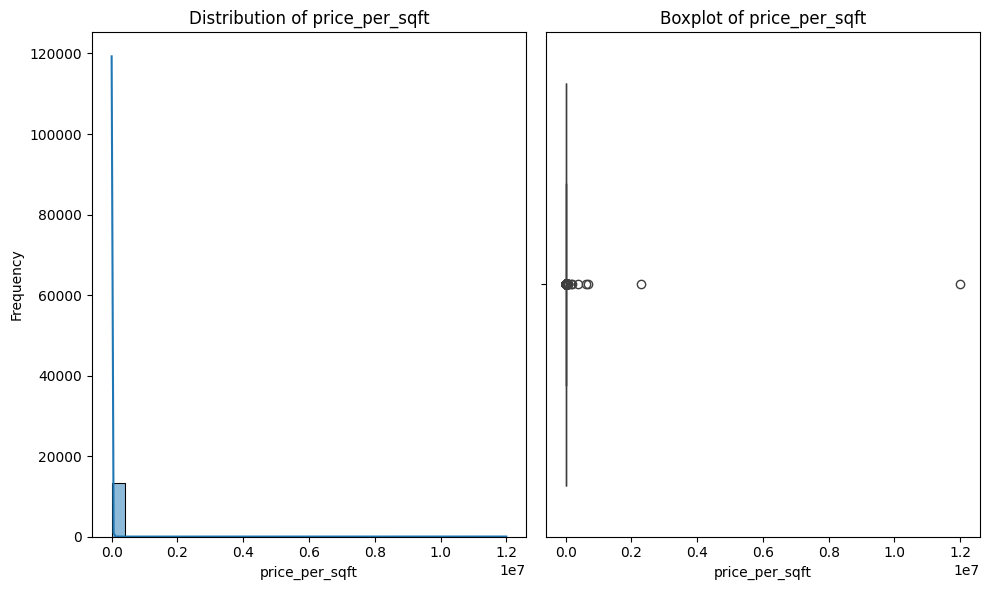

In [32]:
plt.figure(figsize=(15, 10))
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

In [ ]:
#Q2: Detect and Remove Outliers
#a) Mean and Standard Deviation Method

In [29]:
# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

In [27]:
# Define upper and lower limits
upper_limit = mean + 3 * std_dev
lower_limit = mean - 3 * std_dev


In [28]:
# Remove outliers
df_no_outliers_mean_std = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

In [30]:
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Box plot after removing outliers (Mean & Std Dev)')

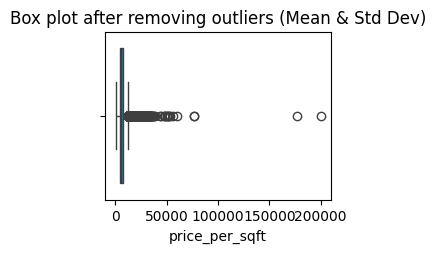

In [31]:
plt.subplot(2, 2, 1)
sns.boxplot(x=df_no_outliers_mean_std['price_per_sqft'])
plt.title('Box plot after removing outliers (Mean & Std Dev)')


Text(0.5, 1.0, 'Distribution after removing outliers (Mean & Std Dev)')

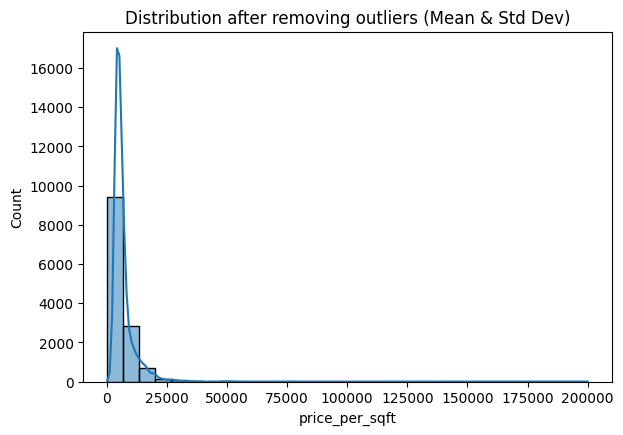

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_no_outliers_mean_std['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution after removing outliers (Mean & Std Dev)')

In [ ]:
#Percentile Method

In [34]:
# Calculate the 1st and 99th percentiles
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

In [35]:
# Remove outliers
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

Text(0.5, 1.0, 'Box plot after removing outliers (Percentile)')

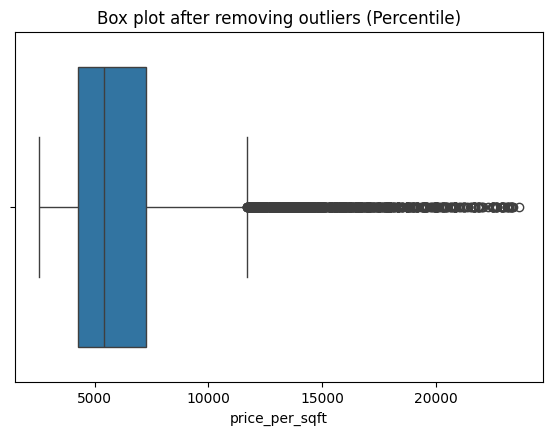

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.boxplot(x=df_no_outliers_percentile['price_per_sqft'])
plt.title('Box plot after removing outliers (Percentile)')


Text(0.5, 1.0, 'Distribution after removing outliers (Percentile)')

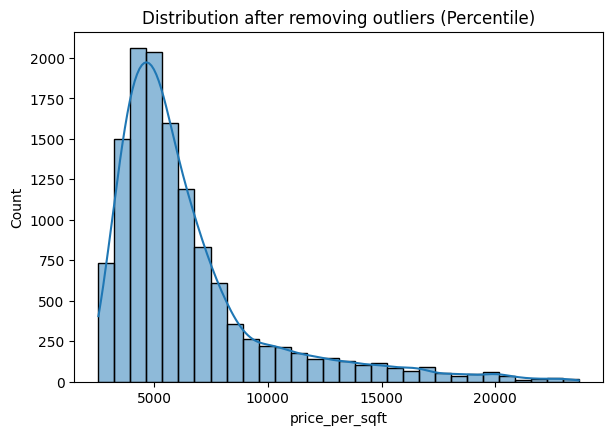

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df_no_outliers_percentile['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution after removing outliers (Percentile)')

In [39]:
# Calculate Q1 and Q3
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# Remove outliers
df_no_outliers_iqr = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

Text(0.5, 1.0, 'Box plot after removing outliers (IQR)')

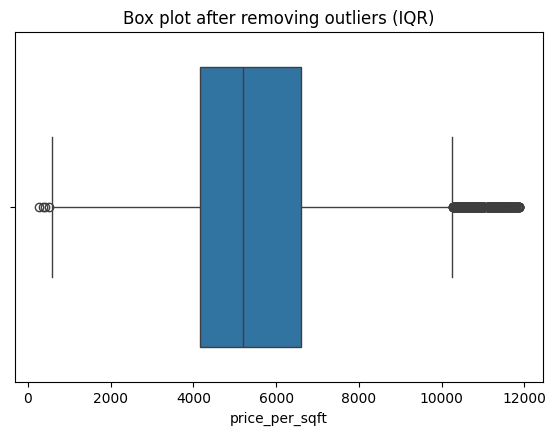

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.boxplot(x=df_no_outliers_iqr['price_per_sqft'])
plt.title('Box plot after removing outliers (IQR)')

Text(0.5, 1.0, 'Distribution after removing outliers (IQR)')

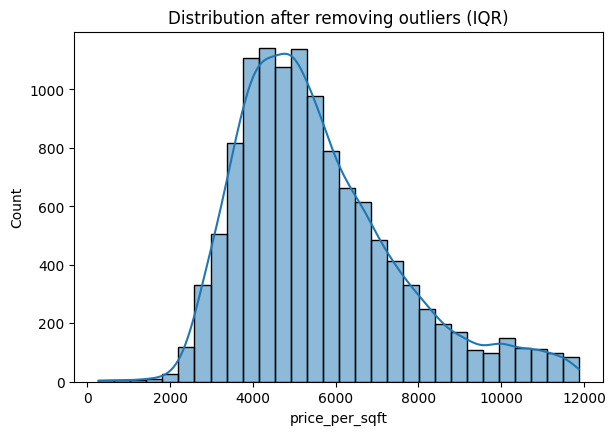

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df_no_outliers_iqr['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution after removing outliers (IQR)')


In [ ]:
#Z Score Method

In [44]:
df['z_score'] = zscore(df['price_per_sqft'])

# Remove outliers
df_no_outliers_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
df_no_outliers_zscore = df_no_outliers_zscore.drop(columns='z_score')

Text(0.5, 1.0, 'Box plot after removing outliers (Z Score)')

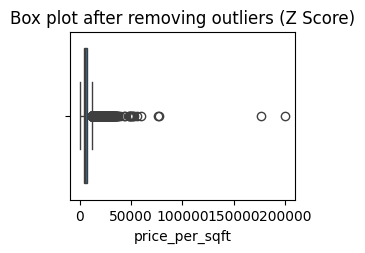

In [45]:
plt.subplot(2, 2, 4)
sns.boxplot(x=df_no_outliers_zscore['price_per_sqft'])
plt.title('Box plot after removing outliers (Z Score)')


Text(0.5, 1.0, 'Distribution after removing outliers (Z Score)')

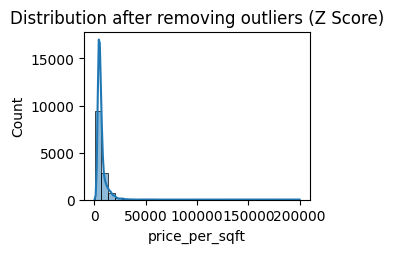

In [48]:
plt.subplot(2, 2, 4)
sns.histplot(df_no_outliers_zscore['price_per_sqft'], kde=True, bins=30)
plt.title('Distribution after removing outliers (Z Score)')


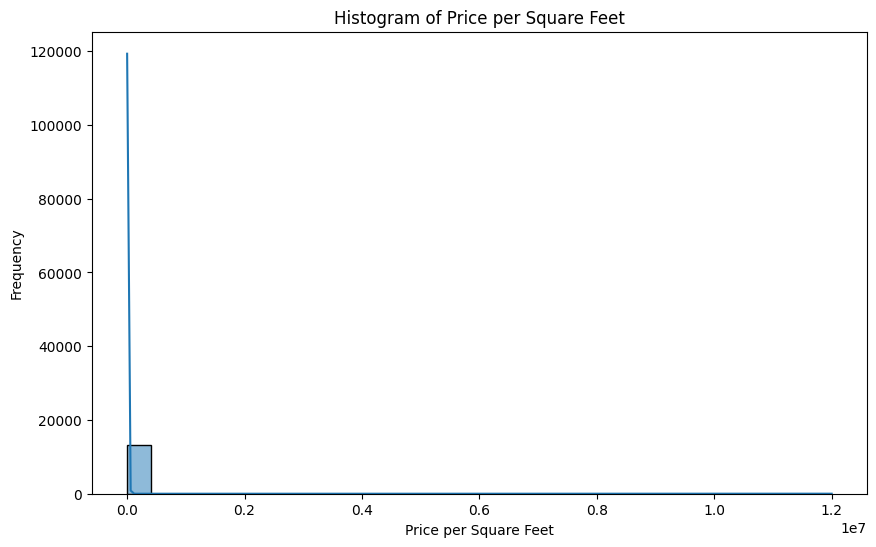

In [49]:
# Plot histogram to check the normality
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Histogram of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Calculate skewness and kurtosis before transformation
skewness_before = skew(df['price_per_sqft'])
kurtosis_before = kurtosis(df['price_per_sqft'])
print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")


Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


In [51]:
# Apply log transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])


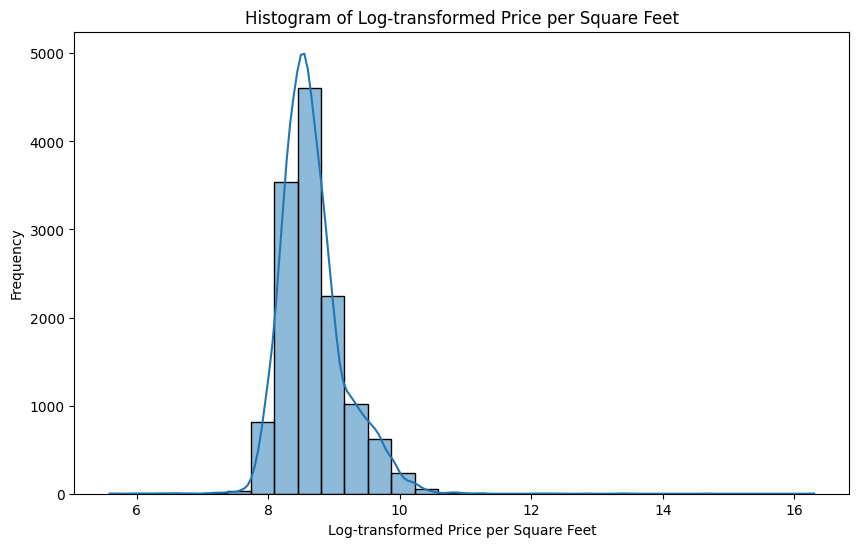

In [52]:
# Plot histogram after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title('Histogram of Log-transformed Price per Square Feet')
plt.xlabel('Log-transformed Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Calculate skewness and kurtosis after transformation
skewness_after = skew(df['price_per_sqft_log'])
kurtosis_after = kurtosis(df['price_per_sqft_log'])
print(f"Skewness after transformation: {skewness_after}")
print(f"Kurtosis after transformation: {kurtosis_after}")

Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


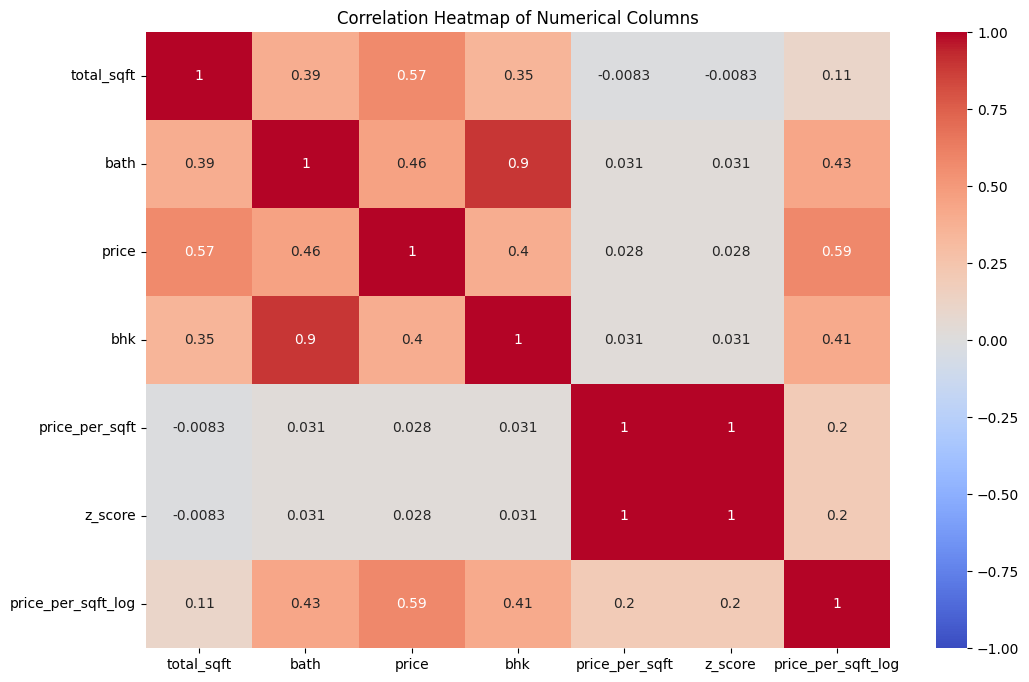

In [61]:

numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


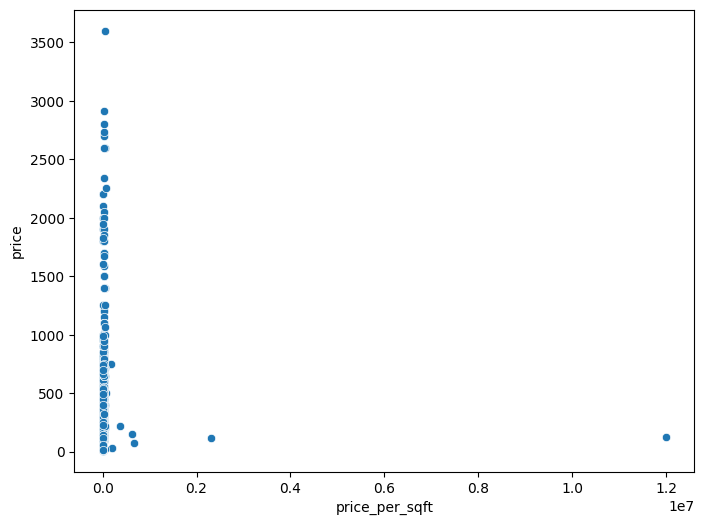

In [66]:
# Draw scatter plot between total_sqft and price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_per_sqft', y='price', data=df)
plt.xlabel('price_per_sqft')
plt.ylabel('price')
plt.show()


